In [112]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
filepath = os.path.abspath('')
samplesFilepath = filepath + '/data-from-samples.csv'
calibrationFilepath = filepath + '/calibration-data.csv'
surveyingFilepath = filepath + '/magneticFieldSurveying.csv'
sample18Filepath = filepath + '/sample18.csv'
MuNaught = float('1.257e-6')
beta = 0.42
g=9.81
volumeContainer = 4.395

In [77]:
def chiEffectiveEquation(vSample,chi,vAir):
    return (vSample) * chi / (vSample + vAir)
def calculateVolume(mass,density):
    return mass / density

In [113]:
samplesData = pd.read_csv(samplesFilepath)
calibrationData = pd.read_csv(calibrationFilepath)
surveyingData = pd.read_csv(surveyingFilepath)
sample18 = pd.read_csv(sample18Filepath)

In [79]:
class Sample:
    def __init__(self,name,high,low,state):
        self.name = name
        self.high = high * float('1e-3')
        self.low = low * float('1e-3')
        self.far = 0
        self.state = state
        self.chiLow = (2* self.low * MuNaught *g) /((0.0095**2)*(beta**2))
        self.chiHigh = (2* self.high * MuNaught *g) /((0.0095**2)*(-beta**2))

In [80]:
samples = {}
listChiLow = []
listChiHigh = []
listchiEffective = []
listVolume = []
for i in samplesData.index:
    name = samplesData['Sample'][i]
    high = samplesData['High'][i]
    low = samplesData['Low'][i]
    state = samplesData['State'][i]
    samples[name] = Sample(name,high,low,state)
    if state == 'solid' and  0 == 1:
        
        area = float(samplesData['width(mm)'][i])/100 * float(samplesData['depth(mm)'][i])/100
        samples[name].chiLow = (2* samples[name].low * MuNaught *g) /((area**2)*(beta**2))
        samples[name].chiHigh = (2* samples[name].high * MuNaught *g) /((area**2)*(beta**2))
        samples[name].area = area
        
        listChiLow.append(samples[name].chiLow)
        listChiHigh.append(samples[name].chiHigh)
        listVolume.append('NaN')
    else:
        listChiLow.append(samples[name].chiLow)
        listChiHigh.append(samples[name].chiHigh)
    if state == 'powder':
        density = float(samplesData['Density'][i])
        mass = float(samplesData['Mass'][i])
        vSample = calculateVolume(mass,density)
        vAir = volumeContainer - vSample
        chiEffective = chiEffectiveEquation(vSample,samples[name].chiHigh,vAir)
        samples[name].chiEffective = chiEffective
        samples[name].density = density
        samples[name].mass = mass
        samples[name].vSample = vSample
        samples[name].vAir = vAir
        listchiEffective.append(chiEffective)
        listVolume.append(vSample)
    elif state == 'powderMix1':
        tMass = float(samplesData['Mass'][i])
        massPercentages = [0.55,64.91,34.54]
        densityList = [5.37,3.95,0.96]
        vSample = 0
        for i in range(len(massPercentages)):
            mass = massPercentages[i] / 100 * tMass
            density = densityList[i]
            vSample += calculateVolume(mass,density)
        chiEffective = chiEffectiveEquation(vSample,samples[name].chiHigh,vAir)
        listchiEffective.append(chiEffective)
        listVolume.append(vSample)
    elif state == 'solid':
        area = float(samplesData['width(mm)'][i])/100 * float(samplesData['depth(mm)'][i])/100
        chiEffective = (2* samples[name].high * MuNaught *g) /((area**2)*(beta**2))
        samples[name].area = area
        samples[name].chiEffective = chiEffective
        listchiEffective.append(chiEffective)
        listVolume.append('NaN')
    else:
        listchiEffective.append('NaN')
        listVolume.append('NaN')



In [81]:

samplesData['Chi Low'] = listChiLow
samplesData['Chi High'] = listChiHigh
samplesData['Volume'] = listVolume
samplesData['Chi Effective'] = listchiEffective
display(samplesData)

,SampleNumber,Sample,Far,High,Low,length(mm),width(mm),depth(mm),State,Mass,Density,Chi Low,Chi High,Volume,Chi Effective
0,1,copper,0,0.010,-0.008,32.48,9.47,9.48,solid,NaN,NaN,-0.000012,-0.000015,NaN,0.000017
1,2,aluminum,0,-0.009,0.015,31.92,9.47,9.40,solid,NaN,NaN,0.000023,0.000014,NaN,-0.000016
2,3,titanium,0,-0.131,0.133,32.86,9.55,9.50,solid,NaN,NaN,0.000206,0.000203,NaN,-0.000223
3,4,bismuth,0,0.066,-0.070,NaN,NaN,NaN,powder,15.412,9.780,-0.000108,-0.000102,1.575869,-0.000037
4,5,cobal wire,0,-0.198,0.211,NaN,NaN,NaN,Na,NaN,NaN,0.000327,0.000307,NaN,NaN
5,6,pyrolytic graphite,0,0.098,-0.096,NaN,NaN,NaN,Na,NaN,NaN,-0.000149,-0.000152,NaN,NaN
6,7,hexahydrate,0,-0.243,0.241,NaN,NaN,NaN,powder,4.841,4.139,0.000373,0.000376,1.169606,0.0001
7,8,gadolinium oxide,0,-2.573,2.576,NaN,NaN,NaN,powder,6.301,7.410,0.003991,0.003986,0.850337,0.000771
8,9,erbium oxide,0,-5.268,5.072,NaN,NaN,NaN,powder,8.513,8.640,0.007857,0.008161,0.985301,0.00183
9,10,Mohr's salt,0,-0.370,0.370,NaN,NaN,NaN,powder,3.487,1.860,0.000573,0.000573,1.874731,0.000244


In [82]:
lengthX = 9.9 * float('1e-3')
class CalibrateData:
    def __init__(self,current,voltage,high,low):
        self.current = current
        self.voltage = voltage
        self.high = high
        self.low = low
        self.betaYHigh = ((abs(high) * float('1e-3')) * g) / (lengthX * current)
        self.betaYLow = ((abs(low) * float('1e-3')) * g) / (lengthX * current)

In [83]:
calibrates = {}
listBetaYLow = []
listBetaYHigh = []
for i in calibrationData.index:
    current  = calibrationData['Current'][i]
    voltage = calibrationData['Voltage'][i]
    high = calibrationData['High'][i]
    low = calibrationData['Low'][i]
    if current:
        calibrates[current] = CalibrateData(current,voltage,high,low)
        listBetaYHigh.append(calibrates[current].betaYHigh)
        listBetaYLow.append(calibrates[current].betaYLow)
    else:
        listBetaYHigh.append('NaN')
        listBetaYLow.append('Nan')


In [84]:
calibrationData['B_y-high'] = listBetaYHigh
calibrationData['B_y-low'] = listBetaYLow
display(calibrationData)

,Current,Voltage,High,Low,B_y-high,B_y-low
0,1.50,0.4,-0.643,0.449,0.42477,0.296612
1,0.00,0.0,0.003,NaN,NaN,Nan
2,-1.50,0.4,0.652,-0.533,-0.430715,-0.352103
3,1.25,0.4,-0.537,0.336,0.425695,0.266356
4,-1.25,0.3,0.549,-0.382,-0.435207,-0.302822
5,1.75,0.4,-0.756,0.487,0.428073,0.275756
6,-1.75,0.4,0.764,-0.447,-0.432603,-0.253106
7,2.00,0.5,-0.865,0.444,0.428568,0.219982
8,-2.00,0.5,0.877,-0.486,-0.434514,-0.240791


In [85]:
names = []
chiLows = []
chiHighs = []
for sampleName in samples:
    sample = samples[sampleName]
    names.append(sample.name)
    chiLows.append(sample.chiLow)
    chiHighs.append(sample.chiHigh)
initialData = pd.DataFrame({'Sample Name':names,
'Chi High':chiHighs,
'Chi Low':chiLows})
initialData = initialData.style.set_caption('Initial Chi: Using area of 0.0095m^2')
display(initialData)


,Sample Name,Chi High,Chi Low
0,copper,-0.000015,-0.000012
1,aluminum,0.000014,0.000023
2,titanium,0.000203,0.000206
3,bismuth,-0.000102,-0.000108
4,cobal wire,0.000307,0.000327
5,pyrolytic graphite,-0.000152,-0.000149
6,hexahydrate,0.000376,0.000373
7,gadolinium oxide,0.003986,0.003991
8,erbium oxide,0.008161,0.007857
9,Mohr's salt,0.000573,0.000573


In [86]:
listNames = []
chiHighs = []
chiLows = []
listAreas = []
for sampleName in samples:
    sample = samples[sampleName]
    if sample.state != 'solid':
        continue
    else:
        listNames.append(sample.name)
        area = sample.area
        sample.chiLow = (2* sample.low * MuNaught *g) /((area**2)*(beta**2))
        sample.chiHigh = (2* sample.high * MuNaught *g) /((area**2)*(-beta**2))
        chiHighs.append(sample.chiHigh)
        chiLows.append(sample.chiLow)
        listAreas.append(sample.area)

solidData = pd.DataFrame({'Sample Name':listNames,
'Area (m^2)':listAreas,
'Chi High':chiHighs,
'Chi Low':chiLows})
solidData = solidData.style.set_caption('Recalculated Chi values using area')
display(solidData)

,Sample Name,Area (m^2),Chi High,Chi Low
0,copper,0.008978,-0.000017,-0.000014
1,aluminum,0.008902,0.000016,0.000026
2,titanium,0.009073,0.000223,0.000226


In [87]:
listNames = []
listChiEffective = []
for sampleName in samples:
    sample = samples[sampleName]
    if sample.state != 'powder':
        continue
    else:
        listNames.append(sample.name)
        listChiEffective.append(sample.chiEffective)

powderData = pd.DataFrame({'Sample Name':listNames,
'Chi Effective':listChiEffective})
powderData = powderData.style.set_caption('Chi Effective for powder samples')
display(powderData)

,Sample Name,Chi Effective
0,bismuth,-0.000037
1,hexahydrate,0.000100
2,gadolinium oxide,0.000771
3,erbium oxide,0.001830
4,Mohr's salt,0.000244
5,iron alum,0.000116
6,blue vitriol,0.000033
7,copper acetate,0.000048
8,manganese oxide,0.000480
9,manganese chloride tetrahydrate,0.000642


In [88]:
xList1 = []
xList2 = []
yList1 = []
yList2 = []
for calibrateCurrent in calibrates:
    dP = calibrates[calibrateCurrent]
    current = dP.current
    if current >=0:
        xList1.append(float(dP.current))
        yList1.append(float(dP.betaYHigh))
    else:
        xList2.append(float(dP.current))
        yList2.append(float(dP.betaYLow))

x1 = np.array(xList1)
x2 = np.array(xList2)
y1 = np.array(yList1)
y2 = np.array(yList2)







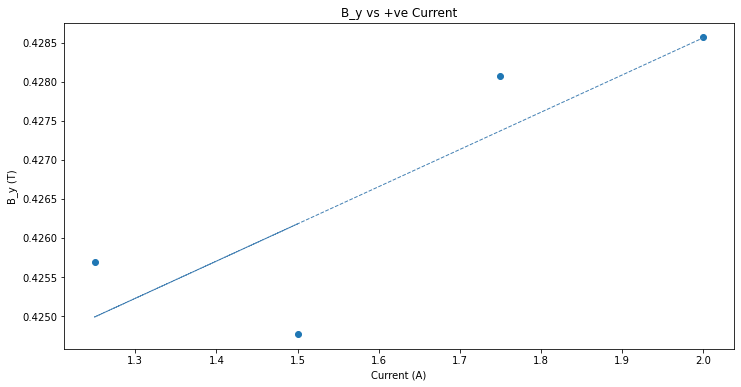

In [110]:
plt.figure(figsize=(12,6))
plt.title('B_y vs +ve Current')
plt.scatter(x1,y1)
a, b = np.polyfit(x1, y1, 1)
plt.plot((x1), a*(x1)+b, color='steelblue', linestyle='--', linewidth=1)
plt.xlabel("Current (A)")
plt.ylabel('B_y (T)')
plt.show()

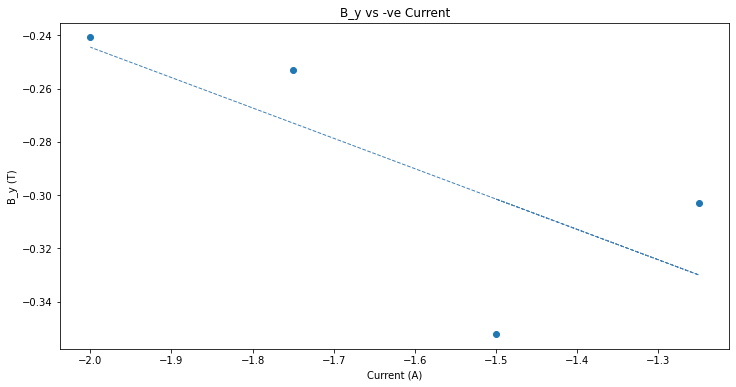

In [109]:
plt.figure(figsize=(12,6))
plt.title('B_y vs -ve Current')
plt.scatter(xList2,yList2)
a, b = np.polyfit(x2, y2, 1)
plt.plot((x2), a*(x2)+b, color='steelblue', linestyle='--', linewidth=1)
plt.xlabel("Current (A)")
plt.ylabel('B_y (T)')
plt.show()

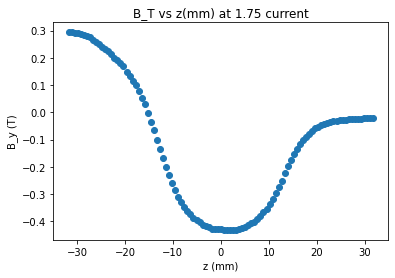

In [115]:
xList = []
yList = []
for i in surveyingData.index:
    z = surveyingData['z (mm)'][i]
    deltaM = float(surveyingData['Δm (g)'][i])
    by = (g * deltaM/1000)/(1.75*0.01)
    xList.append(z)
    yList.append(by)

plt.scatter(xList,yList)
plt.xlabel('z (mm)')
plt.ylabel('B_y (T)')
plt.title('B_T vs z(mm) at 1.75 current')
plt.show()

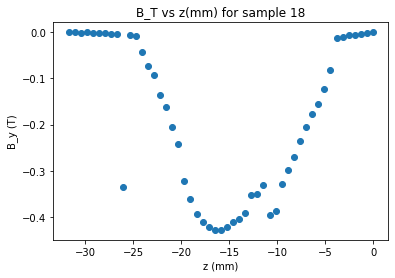

In [121]:
xList = []
yList1 = []
yList2 = []
for i in sample18.index:
    z = sample18['z'][i]
    deltaM = sample18['delta m'][i]
    by = (g * deltaM/1000)/(1.75*0.01)
    xList.append(z)
    yList1.append(by)
    yList2.append(deltaM)

plt.scatter(xList,yList1)
plt.xlabel('z (mm)')
plt.ylabel('B_y (T)')
plt.title('B_T vs z(mm) for sample 18')
plt.show()

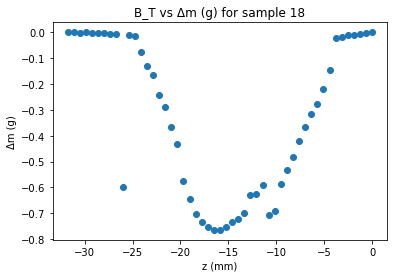

In [122]:
plt.scatter(xList,yList2)
plt.xlabel('z (mm)')
plt.ylabel('Δm (g)')
plt.title('B_T vs Δm (g) for sample 18')
plt.show()